# Lince - Student Team for Aerospace and Rocketry UC3M - 2023

Launched at EUROC'23, with a target apogee of 3k meters using a COTS Solid motor. The main parachute deployed at apogee
Permission to use flight data given by Saúl Hidalgo, 2024.

These results were extracted out of the flight card:

1. Team number: `23`
2. Launch date: `October 12th, 2023. around 10hrs local time`
3. Last simulated apogee before flight: `2806 m` 
4. Official recorded apogee: `3587 m`

The relative error of altitude apogee is only `0.6%`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rocketpy import Function, Environment, Flight, Rocket, SolidMotor
from rocketpy.motors import CylindricalTank, SolidMotor
from rocketpy.motors.tank import MassFlowRateBasedTank

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

## Environment 


Gravity Details

Acceleration of gravity at surface level:    9.8007 m/s²
Acceleration of gravity at   4.000 km (ASL): 9.7888 m/s²


Launch Site Details

Launch Date: 2023-10-12 09:00:00 UTC | 2023-10-12 10:00:00 Portugal
Launch Site Latitude: 39.38970°
Launch Site Longitude: -8.28896°
Reference Datum: WGS84
Launch Site UTM coordinates: 44415.43 W    4373388.31 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 158.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 4.000 km
Reanalysis Time Period: from 2023-10-12 08:00:00 to 2023-10-15 18:00:00 utc
Reanalysis Hour Interval: 1 hrs
Reanalysis Latitude Range: From 40.0° to 39.0°
Reanalysis Longitude Range: From -9.0° to -7.0°

Surface Atmospheric Conditions

Surface Wind Speed: 116.17 m/s
Surface Wind Direction: 296.17°
Surface Wind Heading: 1.10°
Surface Pressure: 1000.00 hPa
Surface Temperature: 294.89 K
Surface Air Density: 1.181 kg/m³
Surface Speed of Sound: 344.25 m/s


Earth Model

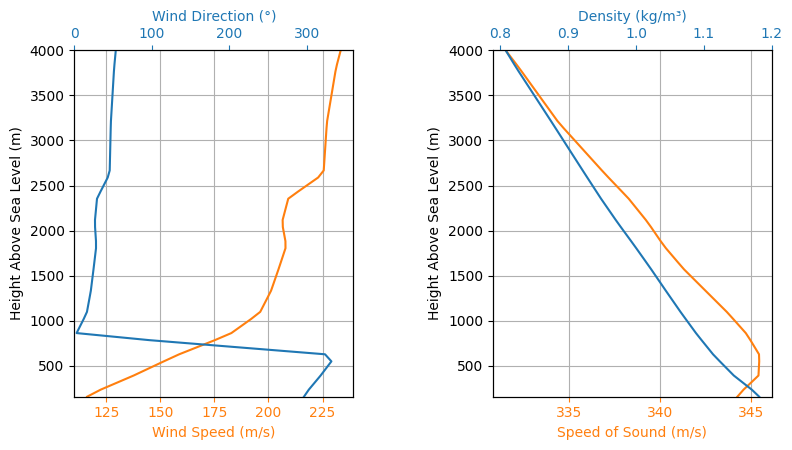

In [3]:
env = Environment(
    date=(2023, 10, 12, 10),
    latitude=39.3897,
    longitude=-8.288964,
    elevation=158,
    datum="WGS84",
    timezone="Portugal",
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/euroc_2023_all_windows.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 4000
env.info()

## Motor

In [4]:
M1101 = SolidMotor(
    thrust_source="../../data/motors/cesaroni/Cesaroni_M1101.eng",
    burn_time=4.736,
    grain_number=4,
    grain_density=1363,
    grain_initial_inner_radius=0.01,
    grain_outer_radius=0.035,
    grain_initial_height=0.16,
    nozzle_radius=0.0335,
    throat_radius=0.0114,
    grain_separation=0.00,
    grains_center_of_mass_position=0.315533,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=1.061,
    dry_mass=0,
)

Nozzle Details
Nozzle Radius: 0.0335 m
Nozzle Throat Radius: 0.0114 m

Grain Details
Number of Grains: 4
Grain Spacing: 0.0 m
Grain Density: 1363 kg/m3
Grain Outer Radius: 0.035 m
Grain Inner Radius: 0.01 m
Grain Height: 0.16 m
Grain Volume: 0.001 m3
Grain Mass: 0.771 kg

Motor Details
Total Burning Time: 4.736 s
Total Propellant Mass: 3.083 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 1686.522 m/s
Average Thrust: 1097.889 N
Maximum Thrust: 1436.62 N at 0.05 s after ignition.
Total Impulse: 5199.605 Ns



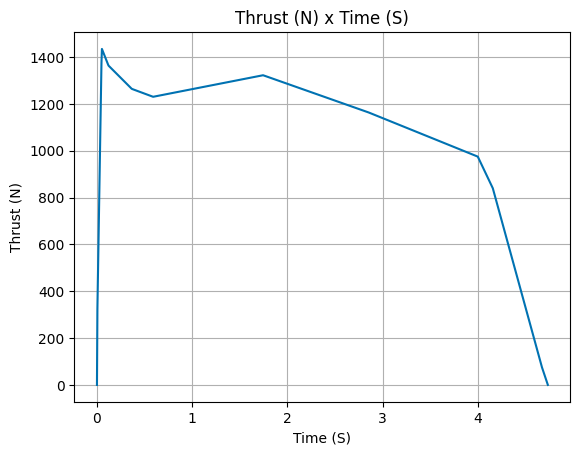

In [5]:
M1101.info()

## Rocket and Aerodynamic surfaces

For comparison purposes, no parachute will be added to the simulation

In [ ]:
Cavour = Rocket(
    radius=0.052,
    mass=8.219,
    inertia=(4.449, 4.449, 0.014634),
    center_of_mass_without_motor=1.1994,
    power_off_drag="../../data/rockets/lince/drag_coefficient_power_off.csv",
    power_on_drag="../../data/rockets/polito/drag_coefficient_power_on.csv",
    coordinate_system_orientation="tail_to_nose",
)

Cavour.set_rail_buttons(1.0954, 0.005400000000000071)



LincePreDeploy = Rocket(
    radius=0.052,
    mass=11.6851352,
    inertia=(4.9939475, 4.9939475, 0.0213204)
    center_of_mass_without_motor=1.061,
    power_off_drag="../../data/rockets/lince/drag_coefficient_power_off.csv",
    power_on_drag="../../data/rockets/lince/drag_coefficient_power_on.csv",
    coordinate_system_orientation="tail_to_nose",
)

LincePreDeploy.add_motor(M1101, position=0)

LincePreDeploy.setRailButtons([0.47949, -0.92551])

LincePreDeploy.addNose(
    length=0.28, 
    kind="vonKarman", 
    distanceToCM=0.97449)

LincePreDeploy.addTrapezoidalFins(
    n=4,
    span=0.0825,
    rootChord=0.17, 
    tipChord=0.0445, 
    distanceToCM=-1.06675
)
LincePreDeploy.addTail(
    topRadius=0.106952 / 2, 
    bottomRadius=0.094 / 2, 
    length=0.03, 
    distanceToCM=-1.07551
)

In [ ]:
LincePostDeploy = Rocket(
    motor=M1101,
    radius=0.106952 / 2,
    mass=9.21 - 0.350,
    inertiaI=19825678296.33 / 1000000000,
    inertiaZ=19269241.79 / 1000000000,
    distanceRocketNozzle=-1.0785,
    distanceRocketPropellant=-0.77,
    powerOffDrag="Drag_motor_off.csv",
    powerOnDrag="Drag_motor_on.csv",
)
LincePostDeploy.setRailButtons([0.47949, -0.92551])

LincePostDeploy.addNose(
    length=0.28, 
    kind="vonKarman", 
    distanceToCM=0.97449)

LincePostDeploy.addTrapezoidalFins(
    4, 
    span=0.0825, 
    rootChord=0.17, 
    tipChord=0.0445, 
    distanceToCM=-1.06675
)

LincePostDeploy.addTail(
    topRadius=0.106952 / 2, 
    bottomRadius=0.094 / 2, 
    length=0.03, 
    distanceToCM=-1.07551
)

## Payload 

In [ ]:
payload = Rocket(
    motor=M1101,
    radius=0.106952 / 2,
    mass=0.350,
    inertiaI=4.65 / 10000,
    inertiaZ=1.82 / 10000,
    distanceRocketNozzle=-1.0785,
    distanceRocketPropellant=-0.77,
    powerOffDrag=0.5,
    powerOnDrag=0.5,
)
# Rail buttons have to be added to the payload, otherwise there is an error
payload.setRailButtons([0.47949, -0.92551])

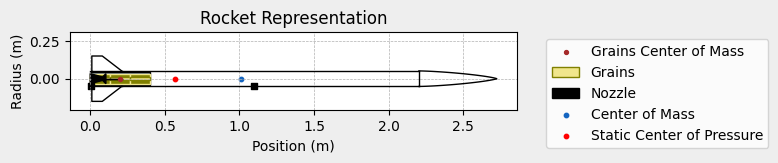

In [ ]:
LincePreDeploy.draw()

## Flight Simulation DATA

In [10]:
test_flight = Flight(
    rocket=Cavour, environment=env, inclination=84, heading=133, rail_length=12
)


Apogee State

Apogee Time: 22.519 s
Apogee Altitude: 2967.405 m (ASL) | 2817.405 m (AGL)
Apogee Freestream Speed: 23.296 m/s
Apogee X position: 482.888 m
Apogee Y position: -511.993 m
Apogee latitude: 39.3840864°
Apogee longitude: -8.2821941°


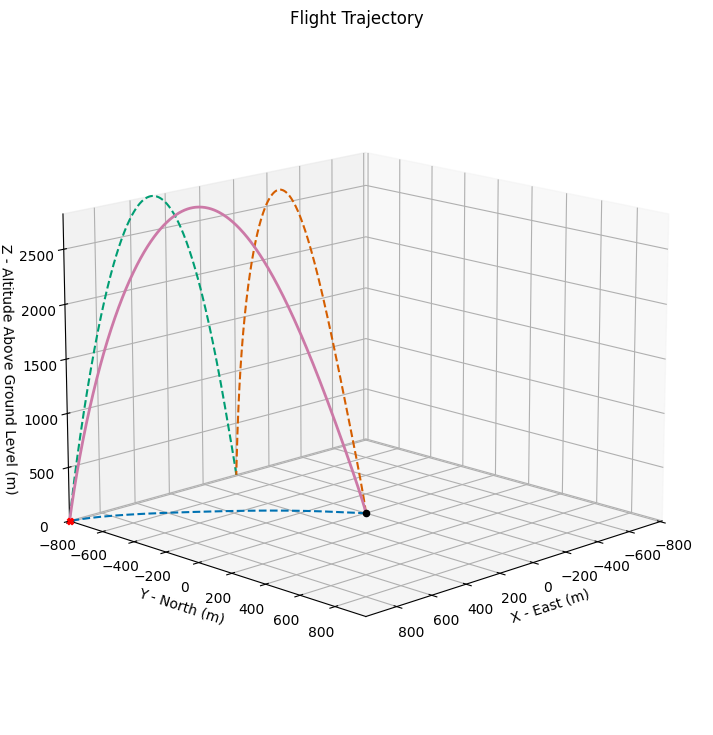

In [11]:
test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()

## Data analysis

In [13]:
from rocketpy.simulation.flight_data_importer import FlightDataImporter


columns_map = {
    "ts": "time",
    "altitude[m]": "altitude",
    "velocity[m/s]": "vz",
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/rockets/polito/altimeter_cavour.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'vz']


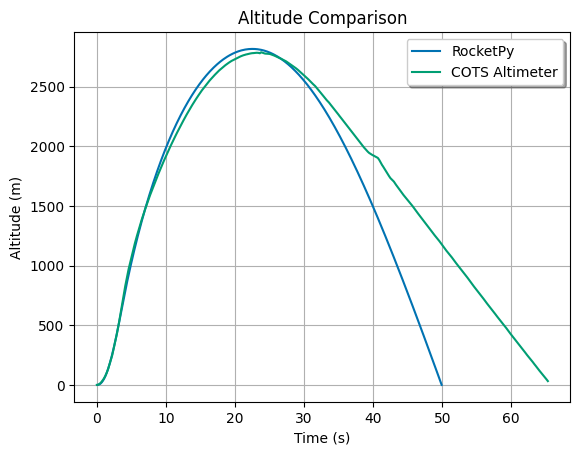

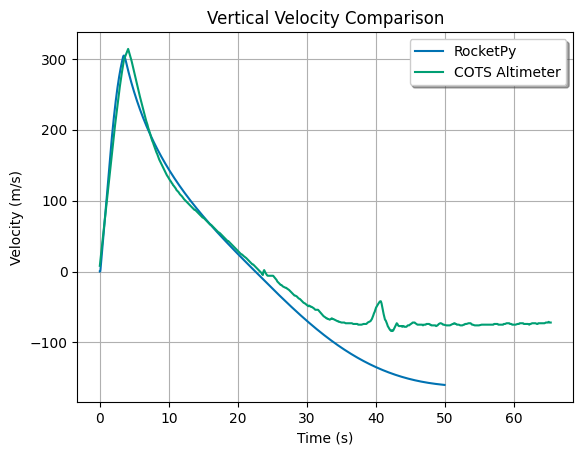

In [14]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
)

Function.compare_plots(
    [
        (test_flight.vz, "RocketPy"),
        (cots_altimeter_flight.vz, "COTS Altimeter"),
    ],
    title="Vertical Velocity Comparison",
    xlabel="Time (s)",
    ylabel="Velocity (m/s)",
)